## Loading the IMDB dataset

In [116]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Decoding reviews back to text

In [117]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

## Encoding the integer sequences via multi-hot encoding

In [118]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): 
        for j in sequence:
            results[i, j] = 1. 
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## Model definition

In [82]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")])

## Compiling the model

In [83]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


## Setting aside a validation set

In [84]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training your model

In [92]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 3s 81ms/step - loss: 0.1639 - accuracy: 0.9417 - val_loss: 0.1625 - val_accuracy: 0.9462
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1411 - accuracy: 0.9520 - val_loss: 0.1704 - val_accuracy: 0.9382
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1212 - accuracy: 0.9601 - val_loss: 0.1811 - val_accuracy: 0.9323
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1039 - accuracy: 0.9687 - val_loss: 0.2009 - val_accuracy: 0.9240
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0898 - accuracy: 0.9732 - val_loss: 0.2166 - val_accuracy: 0.9194
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0774 - accuracy: 0.9797 - val_loss: 0.2211 - val_accuracy: 0.9206
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0659 - accuracy: 0.9829 - val_loss: 0.2365 - val_accuracy: 0.9159
Epoch 8/20
30

## Plotting the training and validation loss

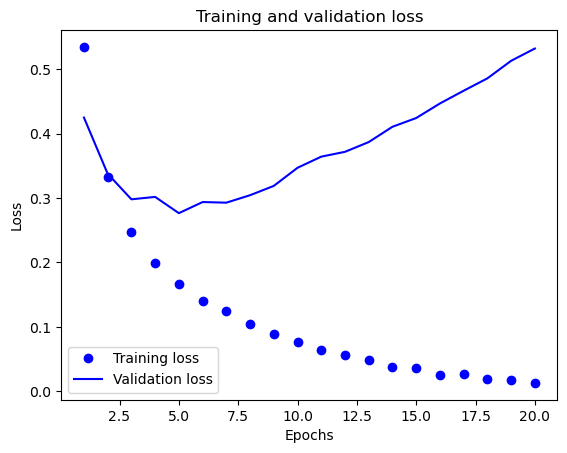

In [87]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [91]:
# Plotting the training and validation accuracy

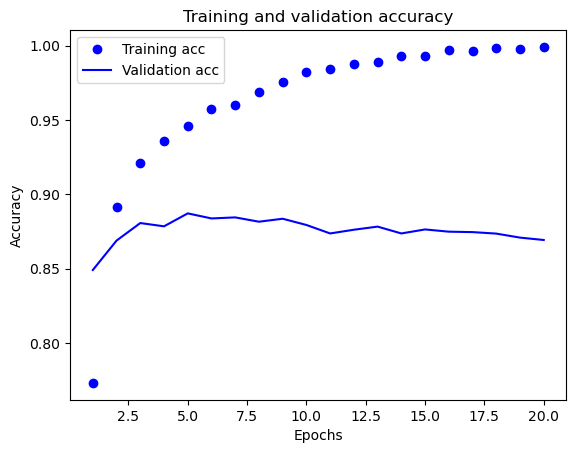

In [88]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Retraining a model from Scratch

In [90]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 19ms/step - loss: 0.4810 - accuracy: 0.8160
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2853 - accuracy: 0.8986
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2216 - accuracy: 0.9212
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2890 - accuracy: 0.8844


[0.2890217900276184, 0.8843600153923035]

In [108]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.00667928],
       [0.99999994],
       [0.96304125],
       ...,
       [0.00151791],
       [0.009787  ],
       [0.99737215]], dtype=float32)

# 2. Reuters Dataset

## Loading the Reuters dataset

In [129]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [130]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [125]:
# Encoding the input data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels): 
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels) 
y_test = to_one_hot(test_labels)

In [128]:
y_train.shape

(8982, 46)

In [134]:
from tensorflow.keras.utils import to_categorical
a = [1,3,1,2]
to_categorical(a)

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [135]:
# Model definition

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")])

Epoch 1/20
16/16 [==============================] - 2s 42ms/step - loss: 2.8036 - accuracy: 0.5197 - val_loss: 1.8671 - val_accuracy: 0.6150
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.5398 - accuracy: 0.6891 - val_loss: 1.3763 - val_accuracy: 0.6940
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1755 - accuracy: 0.7437 - val_loss: 1.2010 - val_accuracy: 0.7350
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9651 - accuracy: 0.7884 - val_loss: 1.0987 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7949 - accuracy: 0.8307 - val_loss: 1.0264 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6639 - accuracy: 0.8611 - val_loss: 0.9677 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5541 - accuracy: 0.8842 - val_loss: 0.9436 - val_accuracy: 0.8020
Epoch 8/20
16

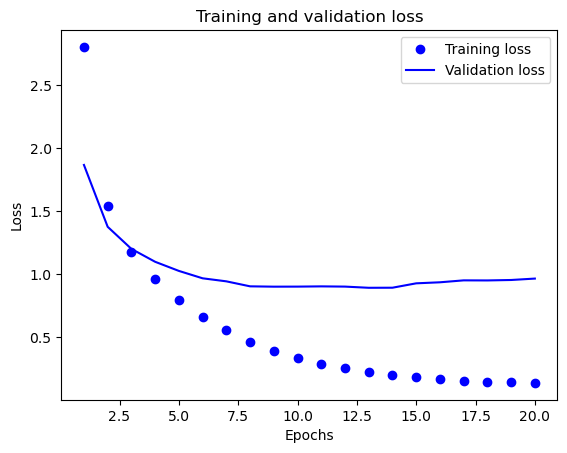

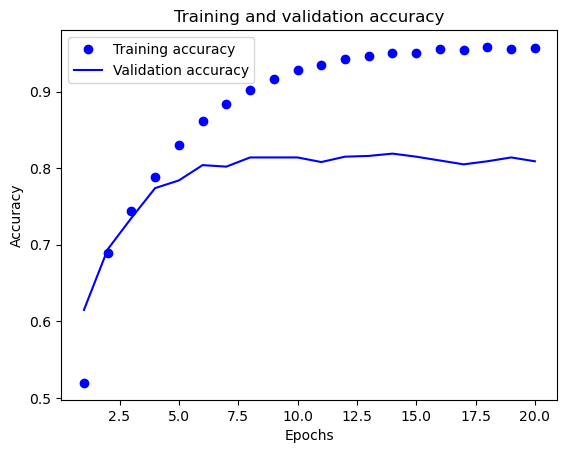

In [137]:
# Compiling the model

model.compile(optimizer="rmsprop",
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])

# Setting aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]
        
# Training the model

history = model.fit(partial_x_train,
                           partial_y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_val, y_val))

# Plotting the training and validation loss

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [3]:
import torch
import torchvision
model = torchvision.models.alexnet(pretrained=True)

/Users/yhuynh/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/yhuynh/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/yhuynh/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
# Dim 0: batch index
# Dim 1: channel index
# Dim 2: row index
# Dim 3: col index

# Need to read image as PIL object, convert to tensor, normalize the image intesities according to

import matplotlib.pyplot as plt
import numpy as np
im = Image.open('dog.jpg')
